In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import matplotlib.pyplot as plt

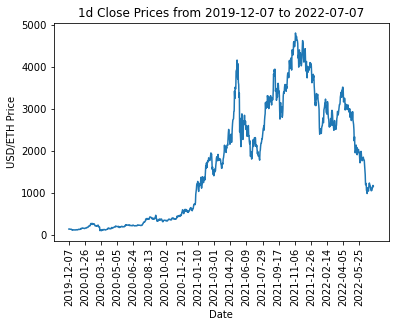

In [179]:
df = pd.read_csv("ETH-USD.csv")

sns.lineplot(x=df.Date,y=df.Close,data=df)
plt.ylabel("USD/ETH Price")
plt.title("1d Close Prices from " + str(df.Date[0]) + " to " + str(df.iloc[-1].Date))
plt.xticks(df.iloc[::50].Date,  rotation='vertical')
plt.show()

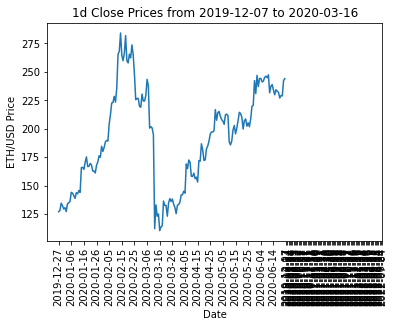

In [173]:
ss = df.iloc[20:200] #small set

sns.lineplot(x=ss.Date,y=ss.Close,data=ss)
plt.ylabel("ETH/USD Price")
plt.title("1d Close Prices from " + str(df.Date[0]) + " to " + str(df.iloc[100].Date))
plt.xticks(df.iloc[::10].Date,  rotation='vertical')
plt.show()

In [174]:
ss.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
20,2019-12-27,126.368797,128.097565,124.820808,127.214607,127.214607,8299390176
21,2019-12-28,127.213013,130.258163,126.899696,128.322708,128.322708,8069298610
22,2019-12-29,128.266876,136.811203,127.997658,134.757980,134.757980,9708776786


In [175]:
returns = []
# rand_date = random.randint(150)
# fram = df[rand_date:-1]
# frame = fram.reset_index()
frame = ss.reset_index()

cash = 10000
trading_fee = 0.005 #Coinbase spot fee 0.5%
tol = 0.12  # tol percent falls

entry_price =  frame.iloc[0].Close
local_top = entry_price
liq_price = (1-tol)*local_top
bb_price = 0
balance = []
eth_count = []
eth_price = []

balance.append((1-trading_fee)*cash)
eth_count.append(((1-trading_fee)*cash)/entry_price)
eth_price.append(entry_price)

In [ ]:
frame.head(15)

250.11139912 247.817596 78.21428870978629


Text(0, 0.5, 'Balance')

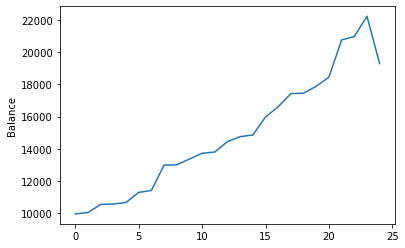

In [177]:
for i in range(1,len(frame.Close)):

    price = frame.iloc[i].Close

    if eth_count[-1] != 0:
        current_bal = eth_count[-1]*price
    else:
        current_bal = balance[-1]  

    if price > local_top and eth_count[-1] != 0: #HODL
        # print(price)
        balance.append(current_bal)
        eth_count.append(eth_count[-1])
        eth_price.append(price)
        local_top = price
        liq_price = (1-tol)*local_top

    elif price < liq_price and eth_count[-1] != 0: #LIQUIDATE
        print(liq_price, price, eth_count[-1])
        balance.append(eth_count[-1]*price*(1-trading_fee))
        eth_count.append(0)
        eth_price.append(price)
        bb_price = liq_price
        liq_price = price

    elif price >= bb_price and eth_count[-1] == 0: #BUYBACK(can upgrade)
        balance.append((1-trading_fee)*balance[-1])
        eth_count.append(balance[-1]/price)
        eth_price.append(price)
        local_top = price
        liq_price = local_top

returns.append((balance[-1]/cash))
    

plt.plot([i for i in range(len(balance))],balance)
plt.ylabel("Balance")

In [178]:
balance[-1]/cash

1.928596261590463